In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d:\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
TRAIN_PATH = "../datasets/train.csv"
TEST_PATH = "../datasets/test.csv"
SAMPLE_SUBMISSION_PATH = "../datasets/sample_submission.csv"

In [3]:
train = pd.read_csv(TRAIN_PATH, delimiter=',')
train.head()

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75 Celcius,NaN,23.89 C,25.76 C,24.28,25.22°C,1012,undetermined,NaN,95,0.82,320.0 °,zero,0,NaN,NaN,100
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58 C,NaN,23.73 C,25.57 C,23.99 C,25.26 C,1012,NaN,NaN,95,0.96 m/s,338.0°,0,0,0,0,100
2,284004000,1979-01-01 02:00:00+00:00,28800,26.6 Celcius,unidentified,24.06 C,26.6 C,26.1 C,27.39,1012,NaN,undetermined,86,1.22 m/s,339.0°,0,volume:zero,NaN,NaN,99
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31 Celcius,NaN,24.37 C,30.9 C,26.59,28.36 C,1012,NaN,undetermined,84,1.08 m/s,342,0.13,nol,0,NaN,94
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05 C,31.54 C,26.58 C,28.31 °C,1011,NaN,undetermined,87,0.86,336.0°,0.34,nol,NaN,0,100


## General

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   datetime      341880 non-null  int64 
 1   datetime_iso  341880 non-null  object
 2   time-zone     341880 non-null  int64 
 3   temp          341880 non-null  object
 4   visibility    51112 non-null   object
 5   d_point       341880 non-null  object
 6   feels         341880 non-null  object
 7   min_temp      341880 non-null  object
 8   max_temp      341880 non-null  object
 9   prssr         341880 non-null  object
 10  sea_level     192964 non-null  object
 11  grnd_level    192919 non-null  object
 12  hum           341880 non-null  object
 13  wind_spd      341880 non-null  object
 14  wind_deg      341880 non-null  object
 15  rain_1h       341880 non-null  object
 16  rain_3h       192329 non-null  object
 17  snow_1h       192696 non-null  object
 18  snow_3h       192699 non

In [5]:
train.duplicated().sum()

0

In [6]:
train.isna().sum()

datetime             0
datetime_iso         0
time-zone            0
temp                 0
visibility      290768
d_point              0
feels                0
min_temp             0
max_temp             0
prssr                0
sea_level       148916
grnd_level      148961
hum                  0
wind_spd             0
wind_deg             0
rain_1h              0
rain_3h         149551
snow_1h         149184
snow_3h         149181
clouds               0
dtype: int64

## Unique value

In [7]:
cols = train.columns

for col in cols:
    print(f"{col} -> nunique: {train[col].nunique()} \n -> unique val: {train[col].unique()} \n ----------------- \n")

datetime -> nunique: 341880 
 -> unique val: [ 283996800  284000400  284004000 ... 1514754000 1514757600 1514761200] 
 ----------------- 

datetime_iso -> nunique: 341880 
 -> unique val: ['1979-01-01 00:00:00+00:00' '1979-01-01 01:00:00+00:00'
 '1979-01-01 02:00:00+00:00' ... '2017-12-31 21:00:00+00:00'
 '2017-12-31 22:00:00+00:00' '2017-12-31 23:00:00+00:00'] 
 ----------------- 

time-zone -> nunique: 1 
 -> unique val: [28800] 
 ----------------- 

temp -> nunique: 9406 
 -> unique val: ['24.75 Celcius' '24.58 C' '26.6 Celcius' ... '136.06 °C' '33.48 Celcius'
 '34.32 C'] 
 ----------------- 

visibility -> nunique: 12 
 -> unique val: [nan 'unidentified' ' ' '-1m' 'unrecognized' 'unknown' '-1 km' '-1'
 'empty' 'undefined' '-1km' '-1 m' 'missing'] 
 ----------------- 

d_point -> nunique: 6121 
 -> unique val: ['23.89  C' '23.73 C' '24.06 C' ... '28.13 C' '28.1 Celcius' '126.76°C'] 
 ----------------- 

feels -> nunique: 10924 
 -> unique val: ['25.76 C' '25.57 C' '26.6 C' ... '153.

## liat liat kolom

In [8]:
train_clean = train.copy()

In [9]:
#datetime -> dihapus karena redundant
train_clean.drop(columns=["datetime"], inplace=True)

In [10]:
# datetime_iso
train_clean["year"] = train_clean["datetime_iso"].str.split("-", expand=True)[0]
train_clean["month"] = train_clean["datetime_iso"].str.split("-", expand=True)[1]

In [11]:
# time-zone
train_clean.drop(columns=["time-zone"], inplace=True)

In [12]:
# temp
train_clean["temp"] = train_clean["temp"].replace({
    "Celcius": "",
    "C" : "",
    "°" : ""
}, regex=True).str.strip().astype("float")

In [13]:
# visibility
train_clean["visibility"] = train_clean["visibility"].replace({
    "-1km": "-1000",
    "-1 km": "-1000",
    "unrecognized": "gatau",
    "unknown" : "gatau",
    "unidentified": "gatau",
    "undefined": "gatau",
    "missing": "gatau",
    "empty": "gatau",
    "m": "",
}, regex=True).str.strip().fillna("gatau").replace({
        "": "gatau"
    })

In [14]:
# d_point
train_clean["d_point"] = train_clean["d_point"].replace({
    "Celcius": "",
    "C": "",
    "°": ""
}, regex=True).str.strip().astype("float")

In [15]:
# feels
train_clean["feels"] = train_clean["feels"].replace({
    "Celcius": "",
    "C": "",
    "°": ""
}, regex=True).str.strip().astype("float")

In [16]:
# min_temp
train_clean["min_temp"] = train_clean["min_temp"].replace({
    "Celcius": "",
    "C": "",
    "°": ""
}, regex=True).str.strip().astype("float")

In [17]:
# max_temp
train_clean["max_temp"] = train_clean["max_temp"].replace({
    "Celcius": "",
    "C": "",
    "°": ""
}, regex=True).str.strip().astype("float")

In [18]:
# prssr
train_clean["prssr"] = train_clean["prssr"].replace({
    "hPa": "",
    r"\s.": ""
}, regex=True).str.strip().astype("float")

In [19]:
# sea_level -> jujur ini maksudnya apaan coba, gaada semua. -1 hPa itu keknya maksudnya gaada data? sementara hapus aja dulu
train_clean["sea_level"].value_counts(), 
train_clean["grnd_level"].value_counts()

train_clean.drop(columns=["sea_level", "grnd_level"], inplace=True)

In [20]:
# hum
train_clean["hum"] = train_clean["hum"].replace({
    "%": ""
}, regex=True).str.strip().astype("float")

In [21]:
# wind_spd
train_clean["wind_spd"] = train_clean["wind_spd"].replace({
    "m/s": ""
}, regex=True).str.strip().astype("float")

In [22]:
# wind_deg
train_clean["wind_deg"] = train_clean["wind_deg"].replace({
    "°": ""
}, regex=True).str.strip().astype("float")

In [23]:
# rain_1h
train_clean["rain_1h"] = train_clean["rain_1h"].replace({
    "mm" : "",
    "zero": "0",
    " ": "0"
}, regex=True).str.strip().astype(float)

In [24]:
# rain_3h -> 0 artinya ga hujan, -1 artinya no inpo
train_clean["rain_3h"] = train_clean["rain_3h"].replace({
    "milimeter": "",
    "mm": "",
    "no-rain": "0",
    "volume:0": "0",
    "nol": "0",
    "no_rain": "0",
    "volume:zero": "0",
    "zero": "0",
}, regex=True).str.strip().fillna("-1").astype(float)

In [25]:
# snow_1h
train_clean["snow_1h"] = train_clean["snow_1h"].replace({
    "milimeter": "",
    "mm": "",
    "no-snow": "0",
    "volume:0": "0",
    "nol": "0",
    "no_snow": "0",
    "volume:zero": "0",
    "zero": "0",
}, regex=True).str.strip().fillna("-1").astype(float)

In [26]:
# snow_3h
train_clean["snow_3h"] = train_clean["snow_3h"].replace({
    "milimeter": "",
    "mm": "",
    "no-snow": "0",
    "volume:0": "0",
    "nol": "0",
    "no_snow": "0",
    "volume:zero": "0",
    "zero": "0",
}, regex=True).str.strip().fillna("-1").astype(float)

In [27]:
# clouds
train_clean["clouds"] = train_clean["clouds"].replace({
    "%": ""
},regex=True).str.strip().astype(float)

In [28]:
train_clean.to_csv("../datasets/cleaned/train_clean_Vbiyu.csv", index=False)

## EDA

<Axes: title={'center': 'Rain 1h per month'}, xlabel='month'>

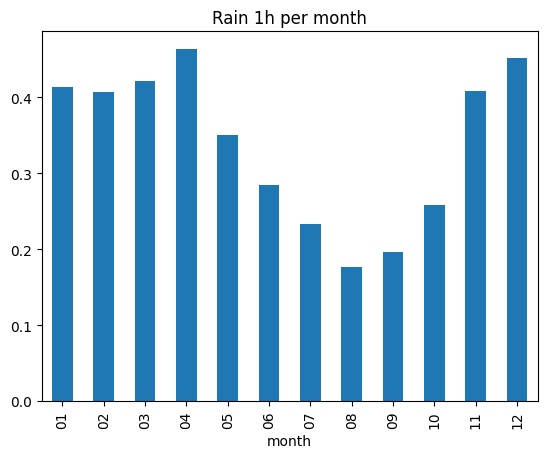

In [29]:
train_clean[["month", "rain_1h"]].groupby(
    "month").mean()["rain_1h"].plot(kind="bar",  title="Rain 1h per month")

<Axes: title={'center': 'feels > 80 Celcius'}, ylabel='Frequency'>

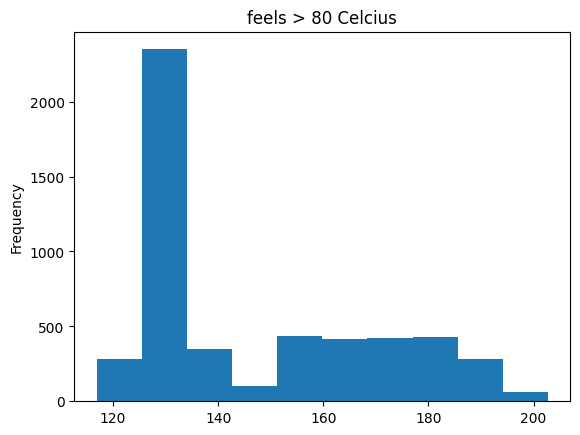

In [30]:
train_clean[train_clean["feels"] > 80]["feels"].plot(kind="hist", title="feels > 80 Celcius")

In [31]:
train_clean[["visibility", "rain_1h"]].groupby("visibility").mean()["rain_1h"]

visibility
-1       0.345484
-1000    0.336436
gatau    0.338060
Name: rain_1h, dtype: float64

<Axes: title={'center': 'Rain 1h per clouds'}, xlabel='clouds'>

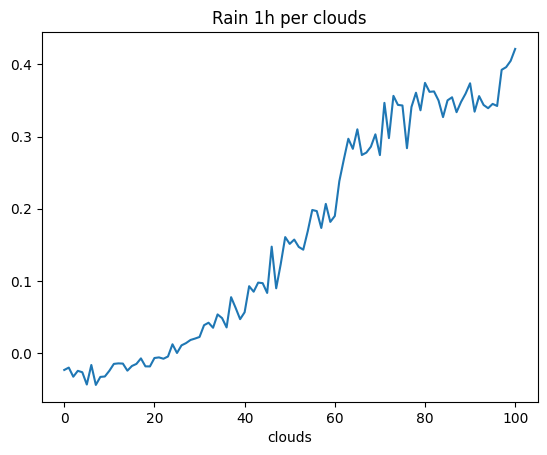

In [32]:
train_clean[["clouds", "rain_1h"]].groupby("clouds").mean()["rain_1h"].plot(kind="line", title="Rain 1h per clouds")

<Axes: title={'center': 'Rain 1h per pressure'}, xlabel='prssr'>

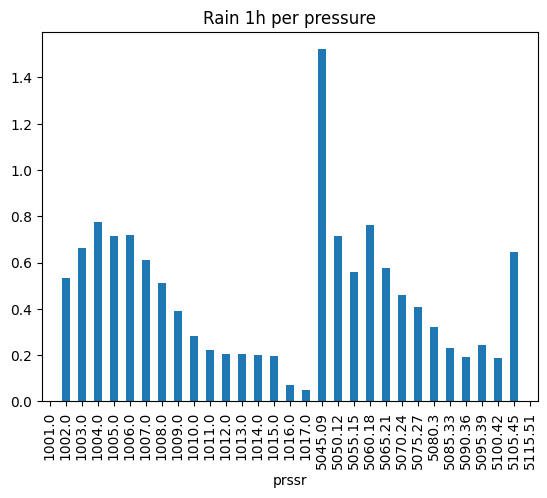

In [33]:
train_clean[["prssr", "rain_1h"]].groupby("prssr").mean()["rain_1h"].plot(kind="bar", title="Rain 1h per pressure")

<Axes: title={'center': 'Rain 1h per humidity'}, xlabel='hum'>

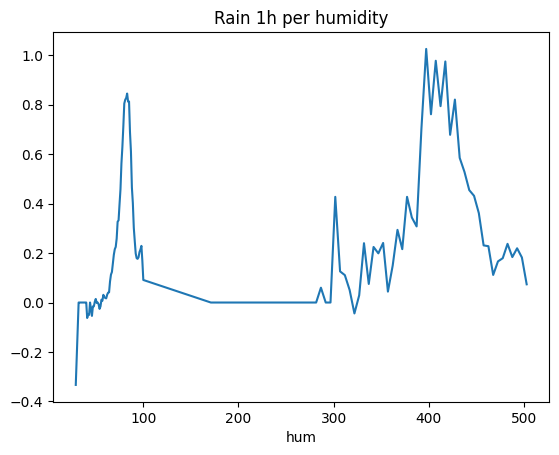

In [34]:
train_clean[["hum", "rain_1h"]].groupby("hum").mean()["rain_1h"].plot(kind="line", title="Rain 1h per humidity")

In [53]:
rain_1h_binary = train_clean["rain_1h"].apply(lambda x: 1.0 if x > 0 else 0.0)
rain_binary_df = pd.DataFrame({
    "rain_1h_binary": rain_1h_binary,
    "rain_3h" : train_clean["rain_3h"],
    "snow_3h" : train_clean["snow_3h"],
    "snow_1h" : train_clean["snow_1h"],
})

rain_binary_df[rain_binary_df["rain_1h_binary"] == 1.0]["rain_3h"].value_counts()

rain_3h
 0.0    72995
-1.0    56622
Name: count, dtype: int64

In [54]:
rain_binary_df[rain_binary_df["rain_1h_binary"]
               == 0.0]["rain_3h"].value_counts()


rain_3h
 0.0    119334
-1.0     92929
Name: count, dtype: int64

In [56]:
119334 / (119334 + 72995)

0.6204680521398229

1. apakah visibility rendah == hujan? nggak
2. cari tau kenapa feels ada yg tinggi bgt
3. semakin tertutup awannya, semakin tinggi curah hujannya
4. pressure menarik, kek ada sweet spotnya
5. humidity gaada trend yg jelas
6. ternyata yg rain_3h sama snow ketika mereka nggak hujan atau salju, kemungkinan besar rain_1h juga nggak hujan. Kemungkinannya 62%